In [12]:
!pip install pyathena

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from pyathena import connect

# Establish connection to Athena
conn = connect(
    s3_staging_dir='s3://lab4data-loch3/athena-results/',
    region_name='us-east-2'
)

print("Connected to Athena!")

Connected to Athena!


In [14]:
# Query Athena
query = 'SELECT vehicle_id, vehicle_co2, _timestamp FROM lab4vehicledb.lab4data_loch3'
df = pd.read_sql(query, conn)

print("Column names in the DataFrame:", df.columns)
print(f"Total records: {len(df)}")
df.head(1000)

/tmp/ipykernel_13525/1777818063.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Column names in the DataFrame: Index(['vehicle_id', 'vehicle_co2', '_timestamp'], dtype='object')
Total records: 155


,vehicle_id,vehicle_co2,_timestamp
0,51,2416.04,2025-12-04T05:59:42Z
1,51,0.00,2025-12-04T05:59:42Z
2,51,0.00,2025-12-04T05:59:43Z
3,51,0.00,2025-12-04T05:59:43Z
4,51,0.00,2025-12-04T05:59:43Z
...,...,...,...
150,55,6197.47,2025-12-04T06:17:12Z
151,55,5927.68,2025-12-04T06:17:12Z
152,55,9162.99,2025-12-04T06:17:12Z
153,55,11922.03,2025-12-04T06:17:13Z


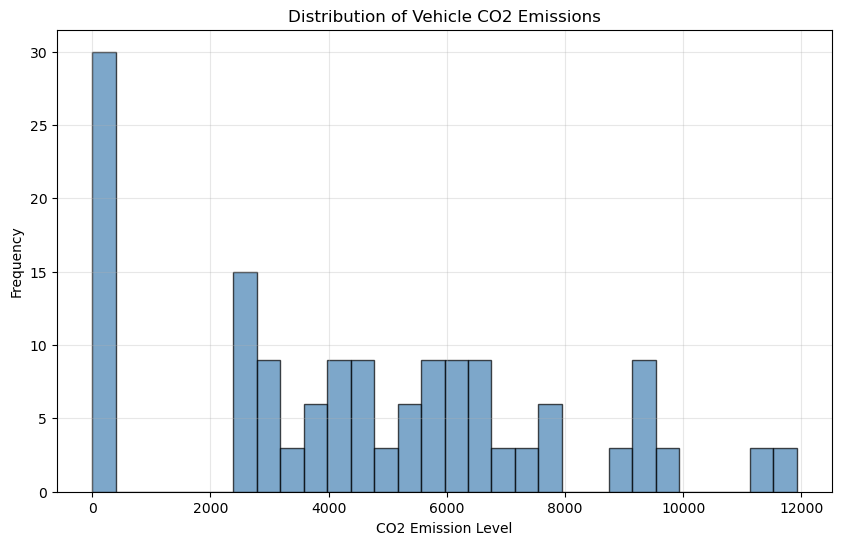

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df['vehicle_co2'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
plt.xlabel('CO2 Emission Level')
plt.ylabel('Frequency')
plt.title('Distribution of Vehicle CO2 Emissions')
plt.grid(True, alpha=0.3)
plt.show()

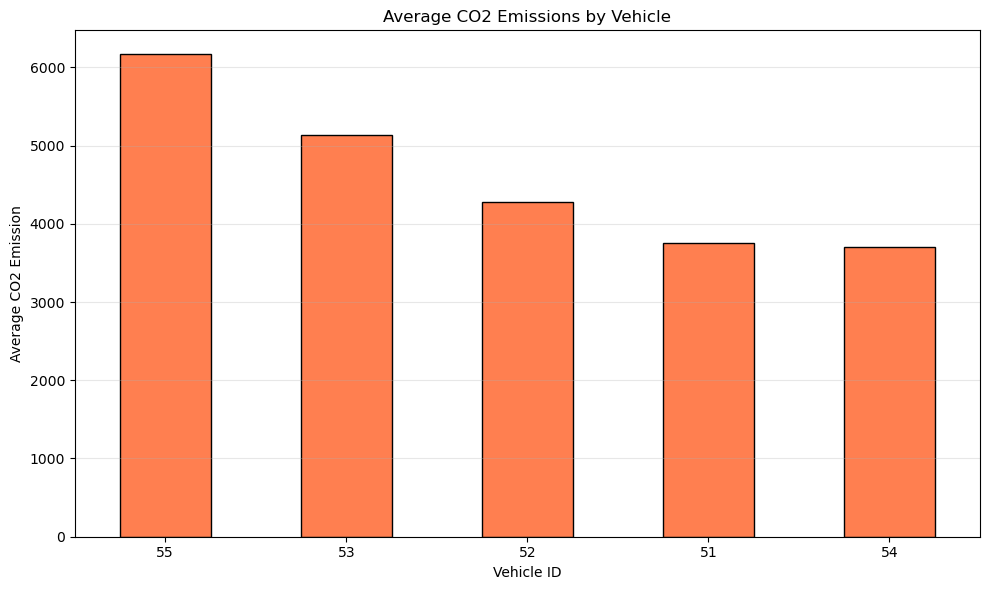

In [16]:
plt.figure(figsize=(10, 6))
avg_co2 = df.groupby('vehicle_id')['vehicle_co2'].mean().sort_values(ascending=False)
avg_co2.plot(kind='bar', color='coral', edgecolor='black')
plt.xlabel('Vehicle ID')
plt.ylabel('Average CO2 Emission')
plt.title('Average CO2 Emissions by Vehicle')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

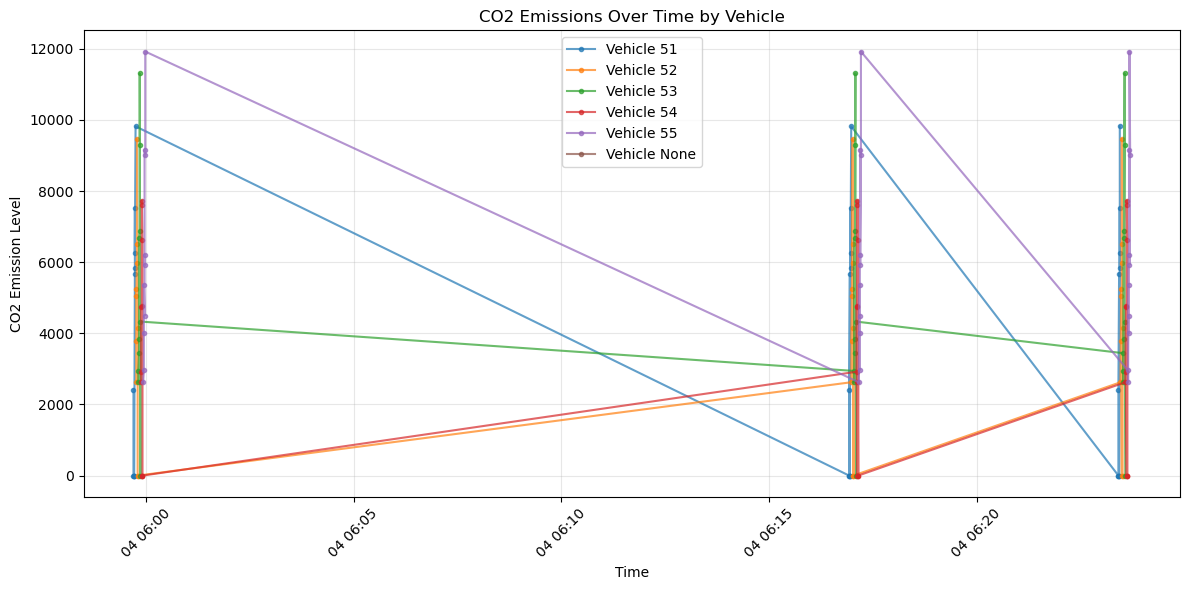

In [9]:
# Convert timestamp to datetime
df['_timestamp'] = pd.to_datetime(df['_timestamp'])

plt.figure(figsize=(12, 6))
for vehicle in df['vehicle_id'].unique():
    vehicle_data = df[df['vehicle_id'] == vehicle].sort_values('_timestamp')
    plt.plot(vehicle_data['_timestamp'], vehicle_data['vehicle_co2'], 
             label=f'Vehicle {vehicle}', marker='o', markersize=3, alpha=0.7)

plt.xlabel('Time')
plt.ylabel('CO2 Emission Level')
plt.title('CO2 Emissions Over Time by Vehicle')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()